In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ddti-thyroid-ultrasound-images/335_1.jpg
/kaggle/input/ddti-thyroid-ultrasound-images/106_2.jpg
/kaggle/input/ddti-thyroid-ultrasound-images/261_1.jpg
/kaggle/input/ddti-thyroid-ultrasound-images/200_1.jpg
/kaggle/input/ddti-thyroid-ultrasound-images/341_1.jpg
/kaggle/input/ddti-thyroid-ultrasound-images/159_1.jpg
/kaggle/input/ddti-thyroid-ultrasound-images/128.xml
/kaggle/input/ddti-thyroid-ultrasound-images/200.xml
/kaggle/input/ddti-thyroid-ultrasound-images/366_1.jpg
/kaggle/input/ddti-thyroid-ultrasound-images/15_1.jpg
/kaggle/input/ddti-thyroid-ultrasound-images/379_1.jpg
/kaggle/input/ddti-thyroid-ultrasound-images/346.xml
/kaggle/input/ddti-thyroid-ultrasound-images/69_1.jpg
/kaggle/input/ddti-thyroid-ultrasound-images/65_1.jpg
/kaggle/input/ddti-thyroid-ultrasound-images/242_1.jpg
/kaggle/input/ddti-thyroid-ultrasound-images/210_2.jpg
/kaggle/input/ddti-thyroid-ultrasound-images/104_1.jpg
/kaggle/input/ddti-thyroid-ultrasound-images/147.xml
/kaggle/input/ddti-th

In [2]:
pip install natsort


Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")
print(f"CUDA Version: {tf.sysconfig.get_build_info()['cuda_version']}")
print(f"cuDNN Version: {tf.sysconfig.get_build_info()['cudnn_version']}")

2024-07-15 22:01:40.497066: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 22:01:40.497183: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 22:01:40.633995: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow Version: 2.15.0
CUDA Version: 12.2
cuDNN Version: 8


In [4]:
import os
import xml.etree.ElementTree as ET
from natsort import natsorted
import pandas as pd
from PIL import Image
import numpy as np
import requests
from zipfile import ZipFile
from io import BytesIO
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import random
from six.moves import xrange
import collections
import string

In [5]:
import matplotlib.mlab as mlab
import matplotlib as mpl
import time
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from matplotlib import pyplot
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [6]:
!pip install beautifulsoup4
!pip install lxml

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [7]:
import pandas as pd
import xml.etree.ElementTree as ET  
from xml.dom import minidom
import os
import shutil  

paths = []
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))

xmls = []
jpgs = []
for path in paths:
    if path.split('.')[-1] == "xml":
        xmls.append(path)
    if path.split('.')[-1] == "jpg":
        jpgs.append(path)
        
print(f"{len(xmls)} XMLs + {len(jpgs)} JPGs = {len(paths)} paths")

390 XMLs + 480 JPGs = 870 paths


In [8]:
tree = ET.parse(xmls[4])
rough_string = ET.tostring(tree.getroot(), 'utf8')
reparsed = minidom.parseString(rough_string)
print(reparsed.toprettyxml(indent="  ").replace("&quot;", '"'))

<?xml version="1.0" ?>
<case>
  <number>142</number>
  <age>52</age>
  <sex>F</sex>
  <composition>solid</composition>
  <echogenicity>marked hypoechogenicity</echogenicity>
  <margins>macrolobulated</margins>
  <calcifications>microcalcifications</calcifications>
  <tirads>4c</tirads>
  <reportbacaf/>
  <reporteco/>
  <mark>
    <image>1</image>
    <svg>[{"points": [{"x": 228, "y": 101}, {"x": 227, "y": 95}, {"x": 222, "y": 87}, {"x": 215, "y": 82}, {"x": 202, "y": 77}, {"x": 191, "y": 73}, {"x": 183, "y": 69}, {"x": 172, "y": 68}, {"x": 160, "y": 68}, {"x": 128, "y": 71}, {"x": 113, "y": 74}, {"x": 90, "y": 81}, {"x": 78, "y": 95}, {"x": 77, "y": 100}, {"x": 73, "y": 117}, {"x": 73, "y": 124}, {"x": 73, "y": 135}, {"x": 73, "y": 140}, {"x": 71, "y": 151}, {"x": 68, "y": 162}, {"x": 74, "y": 176}, {"x": 77, "y": 182}, {"x": 100, "y": 233}, {"x": 111, "y": 244}, {"x": 131, "y": 254}, {"x": 141, "y": 273}, {"x": 146, "y": 275}, {"x": 193, "y": 277}, {"x": 210, "y": 272}, {"x": 222, "y"

In [9]:
data = {
    "Number": [],
    "Age": [],
    "Sex": [],
    "Composition": [],
    "Echogenicity": [],
    "Margins": [],
    "Calcifications": [],
    "Tirads": [],
    "Reportbacaf": [],
    "Reporteco": [],
}
svg_strings = {}
for xml in xmls:
    tree = ET.parse(xml)
    root = tree.getroot()
    case_number = int(root.find("number").text)
    data["Number"].append(case_number)
    if root.find("age").text:
        data["Age"].append(int(root.find("age").text))
    else:
        data["Age"].append(root.find("age").text)
    data["Sex"].append(root.find("sex").text)
    data["Composition"].append(root.find("composition").text)
    data["Echogenicity"].append(root.find("echogenicity").text)
    data["Margins"].append(root.find("margins").text)
    data["Calcifications"].append(root.find("calcifications").text)
    data["Tirads"].append(root.find("tirads").text)
    data["Reportbacaf"].append(root.find("reportbacaf").text)
    data["Reporteco"].append(root.find("reporteco").text)
    
    # Get SVGs. Key: <{case number}_{image index}> which is the same as the respective image filename
    for mark in root.findall("mark"):
        image_idx = mark.find("image").text
        svg_strings[f"{case_number}_{image_idx}"] = mark.find("svg").text

df = pd.DataFrame(data)
df.sort_values(by="Number", inplace=True)
df.set_index("Number", inplace=True)
df.head()

,Age,Sex,Composition,Echogenicity,Margins,Calcifications,Tirads,Reportbacaf,Reporteco
Number,,,,,,,,,
1,NaN,None,None,None,None,None,None,None,None
2,49.0,F,solid,hyperechogenicity,well defined,non,2,None,None
3,31.0,F,spongiform,isoechogenicity,well defined,microcalcifications,4a,None,None
4,37.0,F,spongiform,isoechogenicity,well defined,microcalcifications,4a,None,None
5,47.0,F,solid,hypoechogenicity,ill defined,microcalcifications,5,None,None


In [11]:
df.drop(columns=["Reportbacaf"], inplace=True)

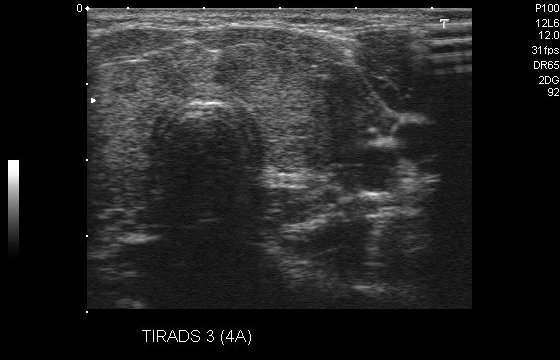

In [12]:
from PIL import Image, ImageDraw
Image.open(jpgs[0])

Text(0, 0.5, '')

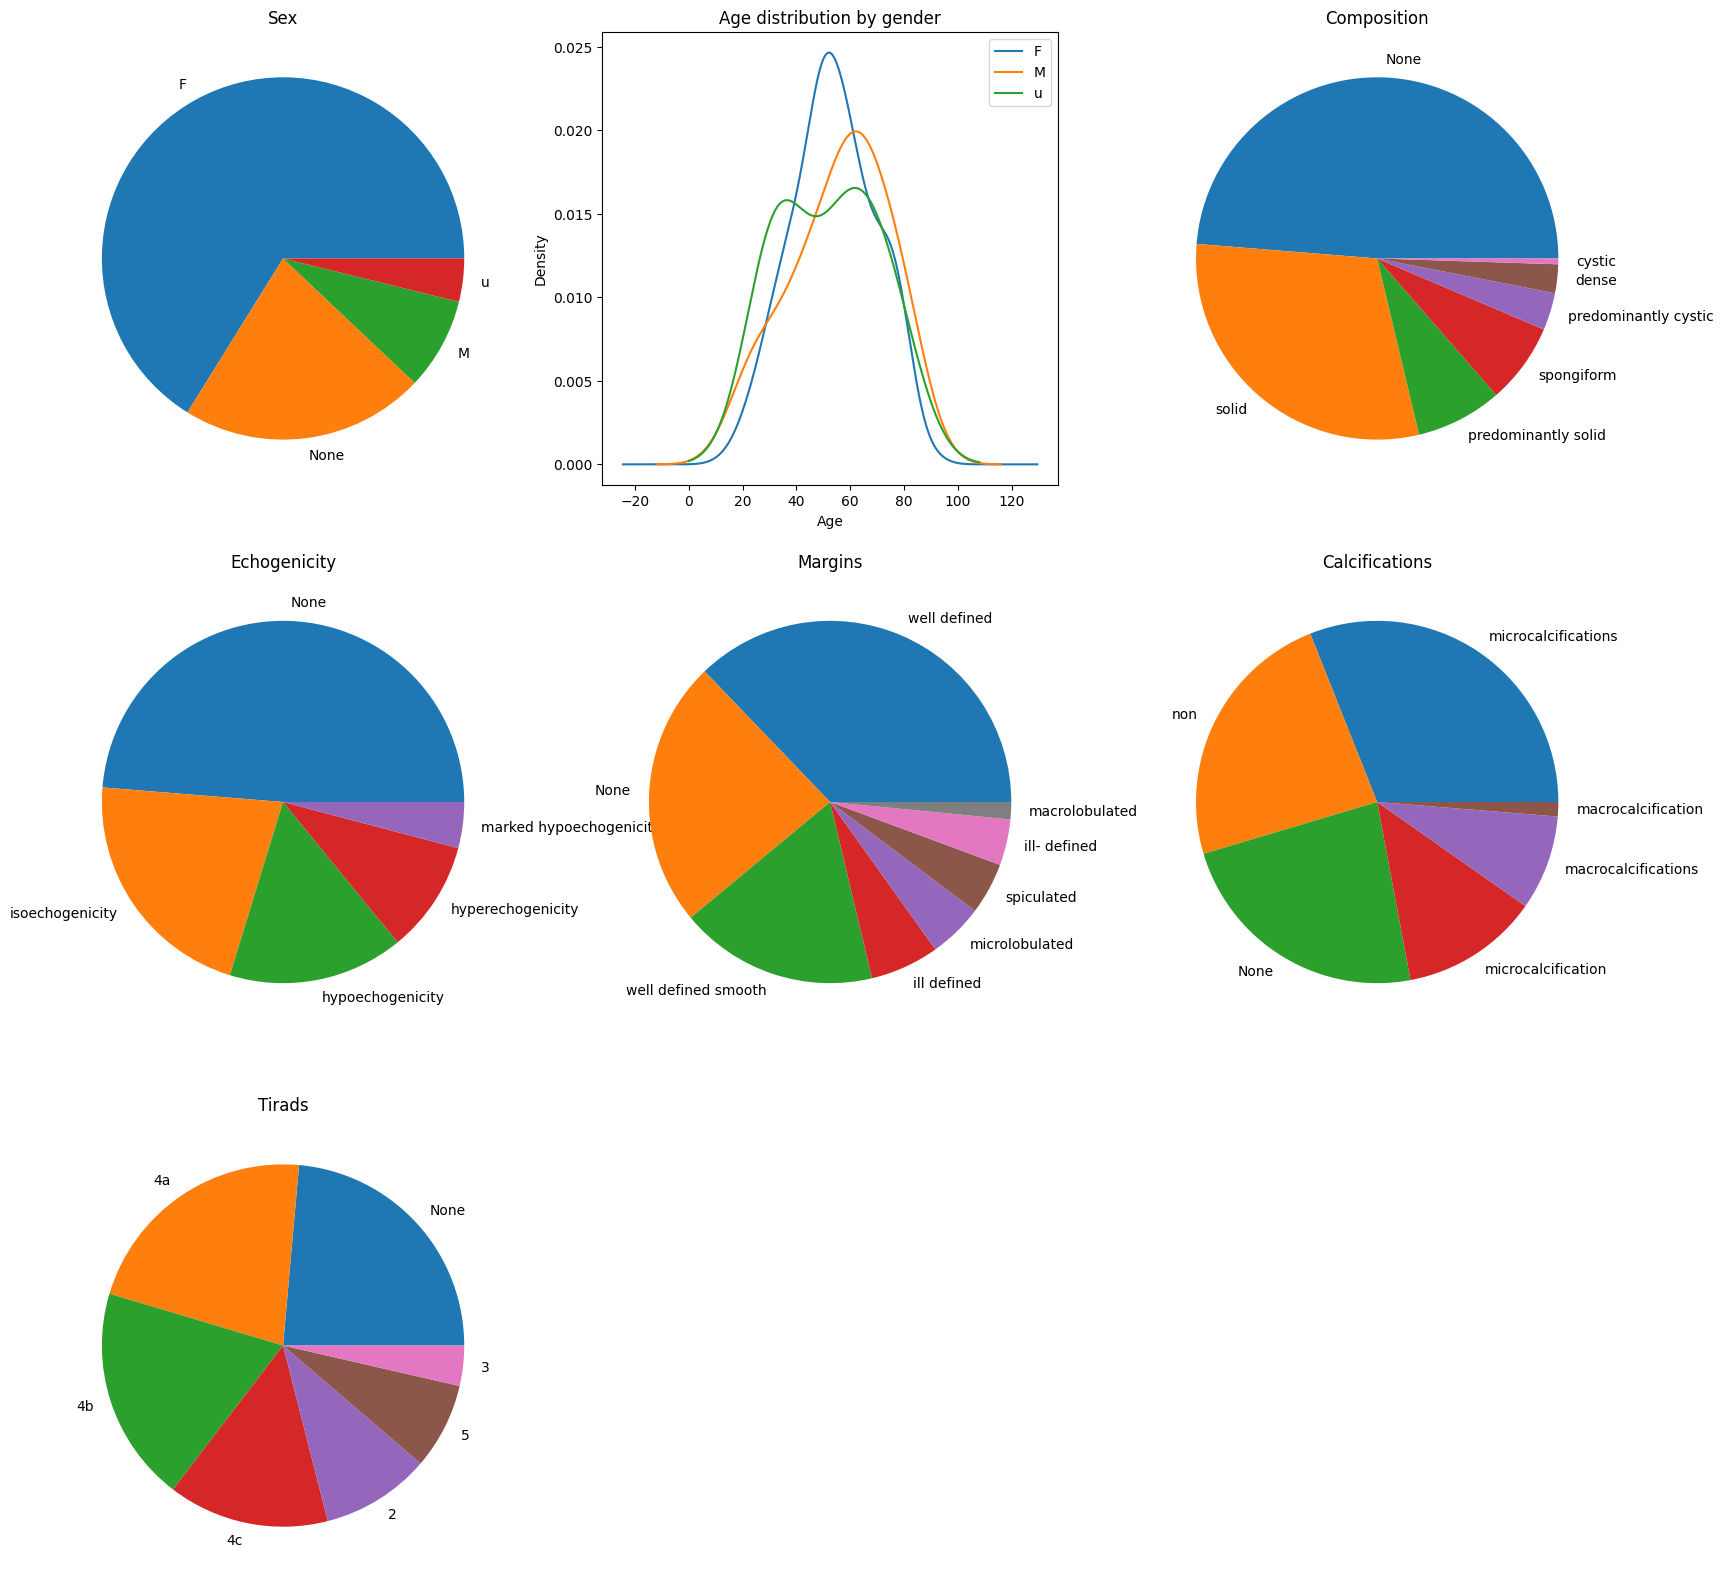

In [13]:
fig = plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1)
plt.title("Sex")
sex = df["Sex"]
sex = sex.fillna("None")
sex.value_counts().plot(kind="pie")
plt.ylabel("")

plt.subplot(3, 3, 2)
plt.title("Age distribution by gender")
df.groupby("Sex")["Age"].plot(kind="kde", legend=True)
plt.xlabel("Age")

plt.subplot(3, 3, 3)
plt.title("Composition")
comp = df["Composition"]
comp = comp.fillna("None")
comp.value_counts().plot(kind="pie")
plt.ylabel("")

plt.subplot(3, 3, 4)
plt.title("Echogenicity")
echo = df["Echogenicity"]
echo = echo.fillna("None")
echo.value_counts().plot(kind="pie")
plt.ylabel("")


plt.subplot(3, 3, 5)
plt.title("Margins")
margins = df["Margins"]
margins = margins.fillna("None")
margins.value_counts().plot(kind="pie")
plt.ylabel("")

plt.subplot(3, 3, 6)
plt.title("Calcifications")
calc = df["Calcifications"]
calc = calc.fillna("None")
calc.value_counts().plot(kind="pie")
plt.ylabel("")

plt.subplot(3, 3, 7)
plt.title("Tirads")
tirads = df["Tirads"]
tirads = tirads.fillna("None")
tirads.value_counts().plot(kind="pie")
plt.ylabel("")

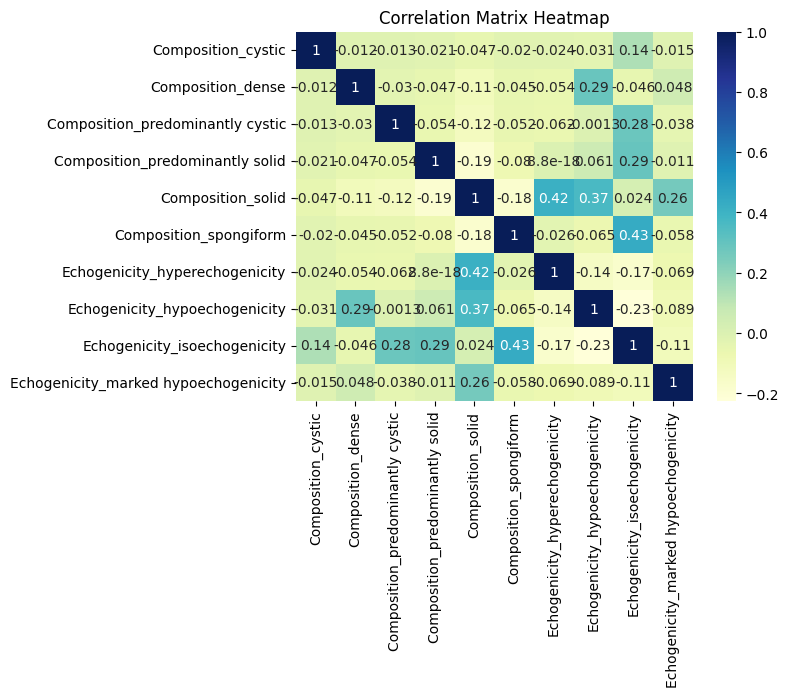

In [14]:
import seaborn as sns
encoded_df = pd.get_dummies(df[["Composition", "Echogenicity"]])
corr = encoded_df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [15]:
def to_dataframe(path):
    dirs=natsorted(os.listdir(path))
    xml_list=[]
    img_list=[]
    for i in range(len(dirs)):
        if '.xml' in dirs[i]:
            xml_list.append(dirs[i])
        if not '.xml'  in dirs[i]:
            img_list.append(dirs[i])
    xml_list=natsorted(xml_list)
    img_list=natsorted(img_list)
    tirads=[]
    for j in range(len(xml_list)):
        tree = ET.parse(path+'/'+xml_list[j])
        a=tree.findall("./tirads")
        if a[-1].text!=None:
            case=[xml_list[j],a[-1].text]
            tirads.append(case)
    data=[]
    for k in range(len(tirads)):
        xml=tirads[k][0][:-4]
        for z in range(len(img_list)):
            if xml+'_1.jpg'==img_list[z] or xml+'_2.jpg'==img_list[z] or xml+'_3.jpg'==img_list[z]:
                m=[img_list[z],tirads[k][1]]
                data.append(m)

    df = pd.DataFrame(data,columns =['Jpeg_Name', 'Tirads'])
    return df

In [16]:
def croping(img,x, y, w, h):
    if abs(w)<abs(h):
        img2=np.zeros([h,h])
        img2[:,h-w:h]=img[y:y+h, x:x+w]
    if abs(h)<abs(w):
        img2=np.zeros([w,w])
        img2[w-h:w,:]=img[y:y+h, x:x+w]
    else:
        return img
    return img2

In [17]:
def convert_one_channel(img):
    if len(img.shape)>2:
        img=img[:,:,0]
        return img
    else:
        return img

In [20]:
def crop_resize(path,resize_shape):
    img=plt.imread(path)
    img=convert_one_channel(np.asarray(img))
    kernel =( np.ones((5,5), dtype=np.float32))
    ret,thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
    thresh = thresh.astype(np.uint8)
    a1,b1=thresh.shape
    thresh=cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel,iterations=3 )
    thresh=cv2.erode(thresh,kernel,iterations =5)
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    c_area=np.zeros([len(contours)])
    for i in range(len(contours)):
        c_area[i]= cv2.contourArea(contours[i])
    cnts=contours[np.argmax(c_area)]
    x, y, w, h = cv2.boundingRect(cnts)
    roi = croping(img, x, y, w, h)
    roi=cv2.resize(roi,(resize_shape),interpolation=cv2.INTER_LANCZOS4)
    return roi

In [21]:
def to_imgmatrix(resize_shape,path,df):
    path=path+'/'
    images=[]
    for i in range (0,len(df["Jpeg_Name"])):
        img=crop_resize(path+df["Jpeg_Name"][i],resize_shape)
            #Convert RGB to use pretrained model
        img=np.uint8(255*(img/(np.max(img))))
        img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        images.append(img)
    return images

In [22]:
def prepare_data(path,resize_shape):
    df=to_dataframe(path)
    data=to_imgmatrix(resize_shape,path,df)
    return df,data

In [23]:
df,data=prepare_data("/kaggle/input/ddti-thyroid-ultrasound-images",(224,224))

In [24]:
def to_categoricalmatrix(df):
    Y = np.zeros([len(df["Tirads"])])
    for i in range(len(df["Tirads"])):
        if df["Tirads"][i] == "2":
            Y[i] = 0
        elif df["Tirads"][i] == "3":
            Y[i] = 1
        elif df["Tirads"][i] == "4a":
            Y[i] = 2
        elif df["Tirads"][i] == "4b":
            Y[i] = 3
        elif df["Tirads"][i] == "4c":
            Y[i] = 4
        elif df["Tirads"][i] == "5":
            Y[i] = 5
    return Y.astype(int)  
y = to_categoricalmatrix(df)
y_one_hot = tf.keras.utils.to_categorical(y, num_classes=6)  

print("Original labels (numeric):")
print(y)

print("\nOne-hot encoded labels:")
print(y_one_hot)

Original labels (numeric):
[0 2 2 5 3 2 4 3 3 5 2 2 0 4 1 0 2 5 3 2 0 2 3 1 2 3 3 5 4 1 2 2 4 3 5 3 2
 2 3 3 4 2 3 5 2 3 2 2 0 2 4 4 3 5 3 0 2 2 0 3 3 2 3 4 2 3 3 5 5 5 5 2 2 5
 5 2 2 2 3 3 3 4 2 2 2 2 2 2 5 3 2 2 2 2 3 2 2 4 2 4 3 2 3 3 3 4 4 3 0 4 3
 3 0 0 2 0 3 4 4 4 4 2 3 3 2 3 3 4 4 4 0 4 3 2 3 4 2 3 2 2 3 4 4 2 3 5 2 2
 5 3 0 3 0 2 3 2 2 2 4 4 3 0 2 4 5 2 2 5 2 3 4 4 4 3 5 3 2 2 2 5 5 4 2 3 3
 4 3 4 4 5 0 2 3 5 2 2 4 2 3 3 3 3 3 2 3 0 4 2 3 3 2 3 4 4 2 3 0 3 4 2 5 3
 1 2 5 5 5 2 5 5 5 4 2 2 2 2 3 0 4 0 2 2 2 1 0 3 4 4 2 5 5 3 4 4 4 4 4 4 3
 4 0 5 5 0 0 1 1 0 0 0 5 5 5 4 4 0 5 4 4 3 2 5 1 1 1 2 2 2 5 5 3 2 2 3 3 0
 3 2 2 0 0 2 2 0 0 3 0 0 1 1 1 4 4 3 0 4 4 4 3 1 1 5 1 1 0 0 4 1 4 4 1 4 2
 0 4 4 4 0 0 4 5 2 2 0 3 3 2]

One-hot encoded labels:
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [25]:
df.head()

,Jpeg_Name,Tirads
0,2_1.jpg,2
1,3_1.jpg,4a
2,4_1.jpg,4a
3,5_1.jpg,5
4,6_1.jpg,4b


In [26]:
def normalize(data):
    normalized_data = []
    for i in range(len(data)):
        normalized_array = data[i] * (1 / np.max(data[i]))
        normalized_data.append(normalized_array)
    return np.float32(normalized_data)


# we need noormalize to images
x=normalize(data)

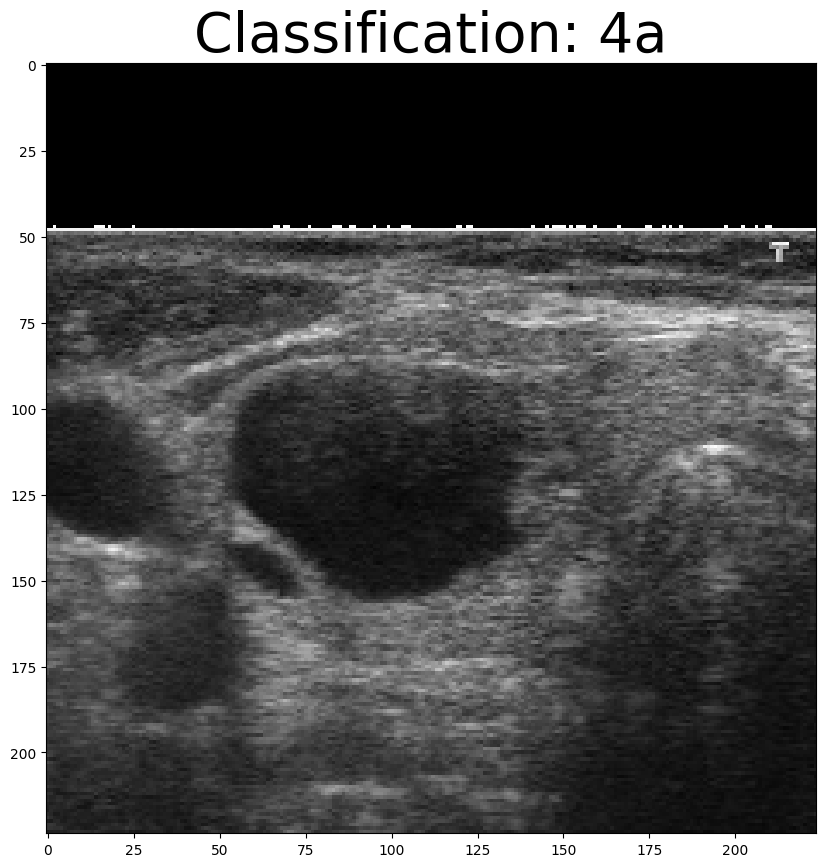

In [27]:
import random
import matplotlib.pyplot as plt

random_number = random.randint(0, len(df["Tirads"]) - 1) 
plt.figure(figsize=(20, 10))
tit = "Classification: " + str(df["Tirads"][random_number])
plt.title(tit, fontsize=40)
plt.imshow(x[random_number, :, :, 0], cmap="gray")
plt.show()

In [28]:
train_indices = list(range(300))
valid_indices = list(range(300, 313))  
test_indices = list(range(313, len(x)))  

x_train = np.copy(x[train_indices])
x_valid = np.copy(x[valid_indices])
x_test = np.copy(x[test_indices])

y_train = np.copy(y[train_indices])
y_valid = np.copy(y[valid_indices])
y_test = np.copy(y[test_indices])

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (300, 224, 224, 3)
y_train shape: (300,)
x_valid shape: (13, 224, 224, 3)
y_valid shape: (13,)
x_test shape: (34, 224, 224, 3)
y_test shape: (34,)


In [29]:
from collections import Counter
from sklearn.utils import resample

class_counts = Counter(y_train)
max_count = max(class_counts.values())
x_balanced = []
y_balanced = []

for label, count in class_counts.items():
    num_samples_to_add = max_count - count
    x_label = x_train[y_train == label]
    y_label = y_train[y_train == label]
    
    if num_samples_to_add > 0:
        x_resampled, y_resampled = resample(x_label, y_label,
                                             n_samples=num_samples_to_add,
                                             replace=True)
        x_balanced.extend(x_label)
        x_balanced.extend(x_resampled)
        y_balanced.extend(y_label)
        y_balanced.extend(y_resampled)
    else:
        x_balanced.extend(x_label)
        y_balanced.extend(y_label)

x_balanced = np.array(x_balanced)
y_balanced = np.array(y_balanced)

print("Distribution après équilibrage :")
print(Counter(y_balanced))

Distribution après équilibrage :
Counter({0: 90, 2: 90, 5: 90, 3: 90, 4: 90, 1: 90})


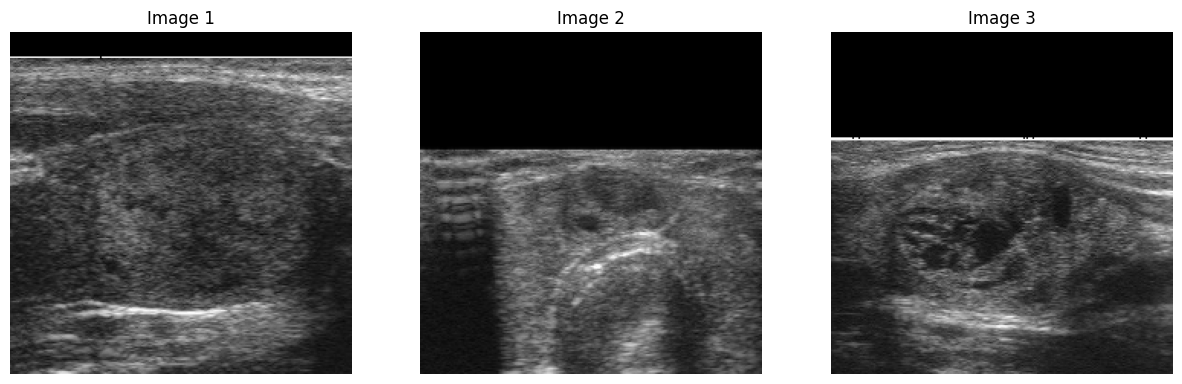

In [30]:
import matplotlib.pyplot as plt

num_images = 3

plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_train[i, :, :, 0], cmap='gray')
    plt.title('Image {}'.format(i + 1))
    plt.axis('off')
plt.show()

In [31]:
from keras import layers

data_augmentation1 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomZoom(height_factor=(-0.2, 0.2), fill_mode="constant"),
    tf.keras.layers.RandomRotation(factor=(-0.2, 0.2), fill_mode="constant"),
    tf.keras.layers.RandomContrast(0.1)
])

x_train1 = data_augmentation1(x_train)
y_train1 = np.copy(y_train)
i = 1

while i < 22:
    x_aug = data_augmentation1(x_train)
    x_train1 = np.concatenate((x_train1, x_aug), axis=0)
    y_aug = np.copy(y_train)
    y_train1 = np.concatenate((y_train1, y_aug))

    if i == 20:
        break
    i += 1

print(f"Augmented x_train shape: {x_train1.shape}")
print(f"Augmented y_train shape: {y_train1.shape}")

Augmented x_train shape: (6300, 224, 224, 3)
Augmented y_train shape: (6300,)


In [32]:
from keras.utils import to_categorical

y_train1 = to_categorical(y_train1, num_classes=6)
y_valid = to_categorical(y_valid, num_classes=6)

In [33]:
def dot_product(x):

    return keras.backend.batch_dot(x[0], x[1], axes=[1,1]) / x[0].get_shape().as_list()[1] 


def signed_sqrt(x):

    return keras.backend.sign(x) * keras.backend.sqrt(keras.backend.abs(x) + 1e-9)


def L2_norm(x, axis=-1):

    return keras.backend.l2_normalize(x, axis=axis)

In [34]:
import tensorflow as tf
from tensorflow import keras

def build_bilinear_model(input_shape, num_classes):
    tensor_input = keras.layers.Input(shape=input_shape)
    tensor_input_clone = keras.layers.Input(shape=input_shape)
    
    base_vgg = keras.applications.VGG16(
        include_top=False,
        weights='imagenet',
        input_tensor=tensor_input
    )
    
    base_vgg_clone = keras.applications.VGG16(
        include_top=False,
        weights='imagenet',
        input_tensor=tensor_input_clone
    )
    
    base_vgg_clone = keras.models.Sequential(layers=base_vgg_clone.layers)
        
    for i, layer in enumerate(base_vgg_clone.layers):
        layer._name = layer.name +"_second"
    
    
    tensor_input_clone_output = keras.models.Model(inputs=[tensor_input_clone], outputs=[base_vgg_clone.layers[-1].output])
    
    
    
    x = base_vgg.layers[-1].output
    y = tensor_input_clone_output(tensor_input_clone) 
    y = y[-1]
    
    print(base_vgg.summary())
    
    print(base_vgg_clone.summary())
    
    x = keras.layers.Reshape((-1, x.shape[3]))(x)
    y = keras.layers.Reshape((-1, y.shape[3]))(y)
    
    
    outer_product = keras.layers.Lambda(lambda tensors: tf.linalg.matmul(tensors[0], tf.transpose(tensors[1], perm=[0, 2, 1])))([x, y])
    
    outer_product = keras.layers.Reshape((-1,))(outer_product)
    
    normalized = keras.layers.Lambda(lambda x: tf.sign(x) * tf.sqrt(tf.abs(x) + 1e-10))(outer_product)
    normalized = keras.layers.Lambda(lambda x: keras.backend.l2_normalize(x, axis=-1))(normalized)
    
    dense = keras.layers.Dense(units=num_classes, activation='softmax')(normalized)
    
    model = keras.models.Model(inputs=[tensor_input, tensor_input_clone], outputs=[dense])
    
    for layer in base_vgg.layers:
        layer.trainable = False
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    
    return model

input_shape = (224, 224, 3)  
num_classes = 6 

model = build_bilinear_model(input_shape, num_classes)
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

model = ResNet50(weights='imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 224, 224,  │      1,792 │ input_layer_1[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 224, 224,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 112, 112,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 112, 112,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 112, 112,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 56, 56,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 56, 56,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 56, 56,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 56, 56,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 28, 28,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 28, 28,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 28, 28,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 28, 28,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 14, 14,    │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 14, 14,    │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 14, 14,    │  2,359,808 │ block5_conv1[0][

 Total params: 29,443,788 (112.32 MB)

 Trainable params: 14,729,100 (56.19 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [35]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_train1 shape:", x_train1.shape)
print("y_train1 shape:", y_train1.shape)

x_train shape: (300, 224, 224, 3)
y_train shape: (300,)
x_valid shape: (13, 224, 224, 3)
y_valid shape: (13, 6)
x_test shape: (34, 224, 224, 3)
y_test shape: (34,)
x_train1 shape: (6300, 224, 224, 3)
y_train1 shape: (6300, 6)


In [ ]:
def train_model(model, x_train, y_train, x_valid, y_valid, epochs):
    history = model.fit(
        x=[x_train, x_train],
        y=y_train,
        batch_size=64,
        epochs=epochs,
        validation_data=([x_valid, x_valid], y_valid) 
    )
        
    
    return history
history = train_model(model, x_train1, y_train1, x_valid, y_valid, epochs=20)

Epoch 1/20


2024-07-15 22:09:37.115252: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[64,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,224,224]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-07-15 22:09:37.536320: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100352: 3.87759, expected 3.06898
2024-07-15 22:09:37.536374: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100353: 6.47516, expected 5.66656
2024-07-15 22:09:37.536383: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100354: 6.23991, expected 5.43131
2024-07-15 22:09:37.536391: E external/local_xla/xla/service/gpu/buffer_compar

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.2947 - loss: 1.6668

2024-07-15 22:11:31.717279: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.05625, expected 3.15318
2024-07-15 22:11:31.717350: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.55379, expected 5.65073
2024-07-15 22:11:31.717360: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.40794, expected 5.50487
2024-07-15 22:11:31.717368: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.4763, expected 4.57323
2024-07-15 22:11:31.717376: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.64422, expected 4.74115
2024-07-15 22:11:31.717383: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.35747, expected 5.45441
2024-07-15 22:11:31.717391: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.0426, expected 5.13953
2024-07-15 22:11:31.717399: E external/local_xla/xla/serv

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.2948 - loss: 1.6665

2024-07-15 22:12:04.031942: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100352: 5.04893, expected 4.24247
2024-07-15 22:12:04.031996: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100353: 6.99988, expected 6.19341
2024-07-15 22:12:04.032006: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100354: 6.949, expected 6.14253
2024-07-15 22:12:04.032014: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100355: 6.3455, expected 5.53903
2024-07-15 22:12:04.032022: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100356: 6.4062, expected 5.59973
2024-07-15 22:12:04.032030: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100357: 6.93991, expected 6.13344
2024-07-15 22:12:04.032038: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100358: 5.95738, expected 5.15092
2024-07-15 22:12:04.0320

99/99 ━━━━━━━━━━━━━━━━━━━━ 161s 897ms/step - accuracy: 0.2948 - loss: 1.6662 - val_accuracy: 0.1538 - val_loss: 2.1708
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 48s 487ms/step - accuracy: 0.2977 - loss: 1.6170 - val_accuracy: 0.0769 - val_loss: 2.1407
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 48s 489ms/step - accuracy: 0.3045 - loss: 1.5997 - val_accuracy: 0.0769 - val_loss: 2.0637
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 48s 488ms/step - accuracy: 0.3068 - loss: 1.5878 - val_accuracy: 0.0769 - val_loss: 2.2905
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 48s 488ms/step - accuracy: 0.3141 - loss: 1.5731 - val_accuracy: 0.0769 - val_loss: 2.1330
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 48s 489ms/step - accuracy: 0.3274 - loss: 1.5596 - val_accuracy: 0.0769 - val_loss: 2.0492
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 82s 489ms/step - accuracy: 0.3240 - loss: 1.5440 - val_accuracy: 0.0769 - val_loss: 2.0053
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 48s 489ms/step - accuracy: 0.3399 - loss: 1.5468 - val_accuracy: 0.00

In [37]:
from sklearn.metrics import confusion_matrix
predict=model.predict([x_test, x_test])

2024-07-14 10:40:27.531894: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.63498, expected 3.85968
2024-07-14 10:40:27.531957: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.55784, expected 5.78254
2024-07-14 10:40:27.531966: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.61282, expected 5.83752
2024-07-14 10:40:27.531974: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.34499, expected 5.56968
2024-07-14 10:40:27.531982: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.25159, expected 5.47629
2024-07-14 10:40:27.531990: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.43964, expected 4.66434
2024-07-14 10:40:27.531997: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.54333, expected 5.76803
2024-07-14 10:40:27.532005: E external/local_xla/xla/se

1/2 ━━━━━━━━━━━━━━━━━━━━ 16s 17s/step

W0000 00:00:1720953642.824002     203 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-07-14 10:40:43.411929: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50176: 3.16198, expected 2.28025
2024-07-14 10:40:43.411996: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50177: 5.67025, expected 4.78852
2024-07-14 10:40:43.412005: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50178: 5.75999, expected 4.87826
2024-07-14 10:40:43.412013: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50179: 4.79602, expected 3.91429
2024-07-14 10:40:43.412021: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50180: 4.89416, expected 4.01243
2024-07-14 10:40:43.412029: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50181: 5.76968, expected 4.88796
2024-07-14 10:40:43.412037: E external/lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step


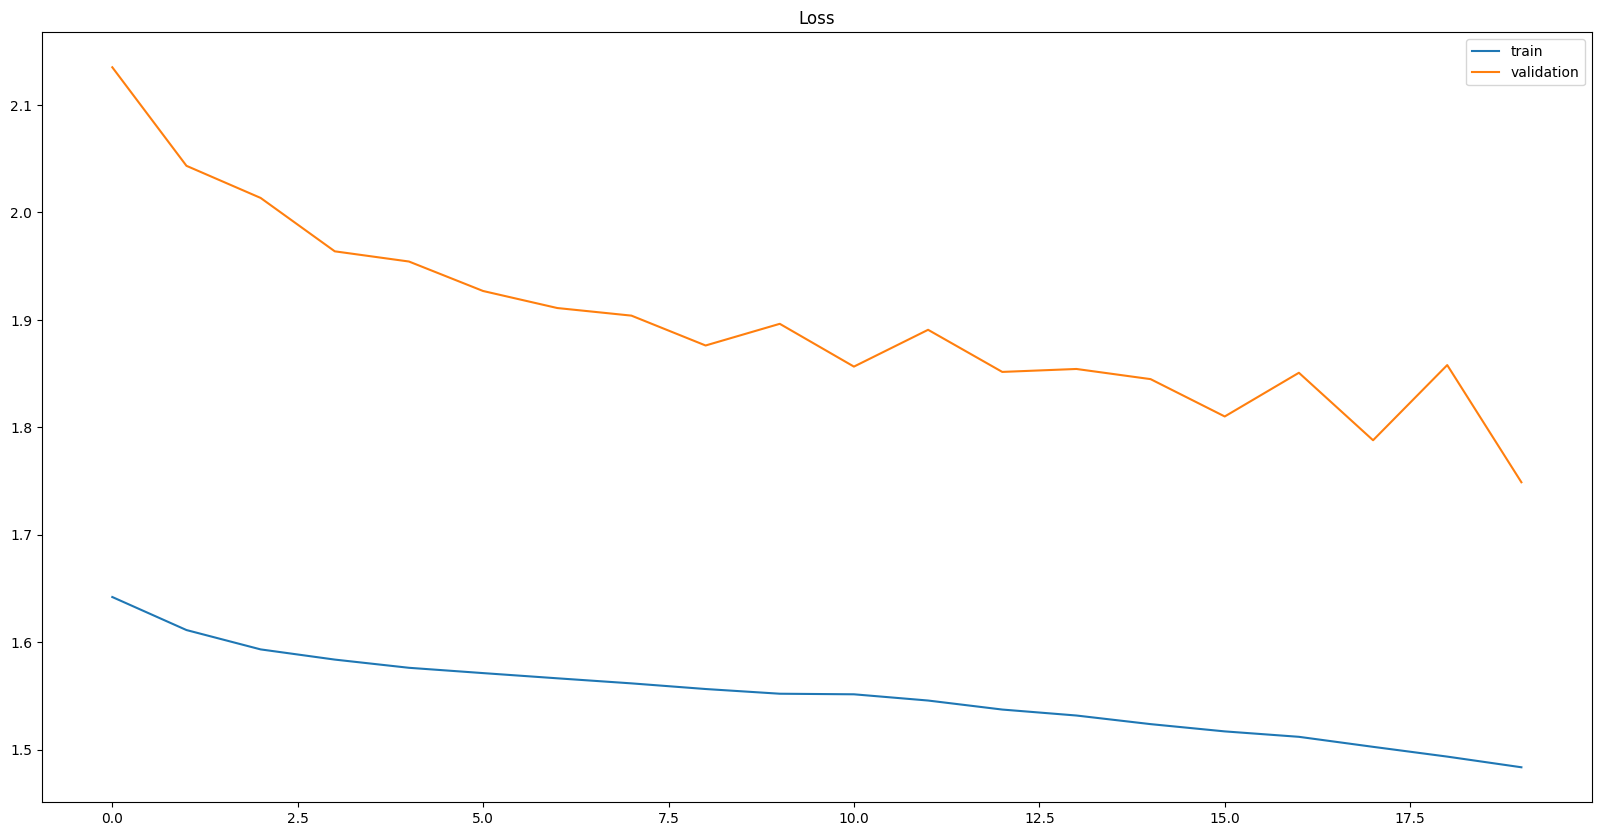

In [38]:
plt.figure(figsize=(20, 10))
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [39]:
import sklearn
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, predict, multi_class='ovr')

print("ROC AUC Score:", auc)

ROC AUC Score: 0.5571047452614482
